In this notebook, I attempt to determine the percentage of light Venus contributes to our observations.

**Still need to do this with new observations**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [53]:
skyfile = 'venus_data/sky20180426_1.dat'
venusfile = 'venus_data/venus20180426_3.dat'

In [54]:
def get_data(name):
    # Open the first file and read the first two lines
    f=open(name,'r')
    line1 = f.readline()
    wlen = f.readline()
    f.close()
    # Saves wavelengths from the second line
    wlen = np.array([float(i) for i in wlen.split(',')[1:]])
    obs_time = line1[12:]
    # Reads the rest of the data
    dat = np.loadtxt(name,skiprows=2,delimiter=',')
    # Saves time and flux data
    time = dat[:,0]
    allflux = dat[:,1:]
    return wlen,allflux,time,obs_time

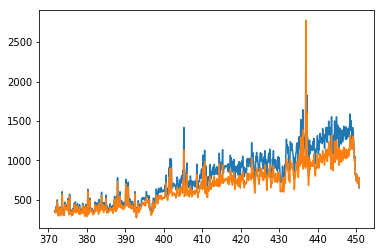

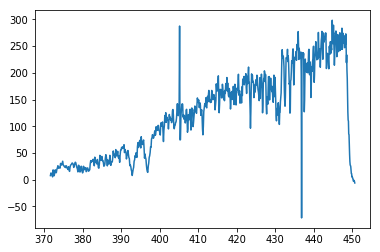

0.841255378367


In [60]:
wavelen,skyflux,time,obs_time = get_data(skyfile)
meanskyflux = [np.mean(skyflux[1:,i]) for i in range(len(wavelen))]

wavelen,venusflux,vtime,obs_time = get_data(venusfile)
meanvenusflux = [np.mean(venusflux[1:60,i]) for i in range(len(wavelen))]

plt.plot(wavelen[300:1050],meanvenusflux[300:1050])
plt.plot(wavelen[300:1050],meanskyflux[300:1050])
plt.show()

plt.plot(wavelen[300:1050],np.subtract(meanvenusflux[300:1050],meanskyflux[300:1050]))
plt.show()

allvlight = sum(meanvenusflux[300:1050])
allslight = sum(meanskyflux[300:1050])
print allslight/allvlight